In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree

# **House Price Prediction in India**


## Import dataset

In [2]:
test = pd.read_csv("../data/test.csv")
train = pd.read_csv("../data/train.csv")

In [3]:
test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [4]:
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


## Basic data info

In [5]:
cols = train.columns
cols

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

In [6]:
cat_col = [col for col in cols if len(train[col].unique()) < 17]
cat_col.append('ADDRESS')
cat_col

['POSTED_BY',
 'UNDER_CONSTRUCTION',
 'RERA',
 'BHK_NO.',
 'BHK_OR_RK',
 'READY_TO_MOVE',
 'RESALE',
 'ADDRESS']

In [7]:
num_col = [col for col in cols if col not in cat_col]
num_col

['SQUARE_FT', 'LONGITUDE', 'LATITUDE', 'TARGET(PRICE_IN_LACS)']

In [8]:
test.shape

(68720, 11)

In [9]:
train.shape

(29451, 12)

In [10]:
train.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [11]:
train[num_col].describe()

,SQUARE_FT,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,2.945100e+04,29451.000000,29451.000000,29451.000000
mean,1.980217e+04,21.300255,76.837695,142.898746
std,1.901335e+06,6.205306,10.557747,656.880713
min,3.000000e+00,-37.713008,-121.761248,0.250000
25%,9.000211e+02,18.452663,73.798100,38.000000
50%,1.175057e+03,20.750000,77.324137,62.000000
75%,1.550688e+03,26.900926,77.828740,100.000000
max,2.545455e+08,59.912884,152.962676,30000.000000


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [13]:
train.nunique()

POSTED_BY                    3
UNDER_CONSTRUCTION           2
RERA                         2
BHK_NO.                     16
BHK_OR_RK                    2
SQUARE_FT                19561
READY_TO_MOVE                2
RESALE                       2
ADDRESS                   6899
LONGITUDE                 4087
LATITUDE                  4078
TARGET(PRICE_IN_LACS)     1172
dtype: int64

In [14]:
train.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [15]:
train.duplicated().sum()

np.int64(401)

In [16]:
train[train.duplicated()]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
1904,Dealer,1,0,3,BHK,1209.628644,0,1,"Salt Lake,Kolkata",22.541110,88.337780,100.0
2351,Dealer,0,0,2,BHK,896.680112,1,1,"Zirakpur,Chandigarh",30.662283,76.822397,28.9
2611,Dealer,0,0,3,BHK,1350.256549,1,1,"Sector 78 Faridabad,Faridabad",28.380160,77.369936,50.0
2618,Dealer,1,0,2,BHK,800.000000,0,1,"Chandapura,Bangalore",12.800090,77.711820,27.0
3211,Owner,0,0,2,BHK,712.105799,1,1,"BataNagar,Kolkata",22.506860,88.223965,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29321,Dealer,0,1,1,BHK,649.641577,1,1,"Zirakpur,Chandigarh",30.662283,76.822397,14.5
29345,Dealer,1,1,3,BHK,1563.155686,0,1,"Sector-88 Mohali,Mohali",30.684523,76.691728,74.5
29357,Owner,0,1,3,BHK,1446.201311,1,1,"Sector-70 Noida,Noida",28.596320,77.381430,75.0
29389,Builder,1,0,3,BHK,979.290979,0,0,"Barasat,Kolkata",22.747639,88.600902,27.9


### Dropping Duplicate values

In [17]:
train.drop_duplicates(inplace=True)

In [18]:
train.duplicated().sum()

np.int64(0)

In [19]:
train.shape

(29050, 12)

### Distribution of data

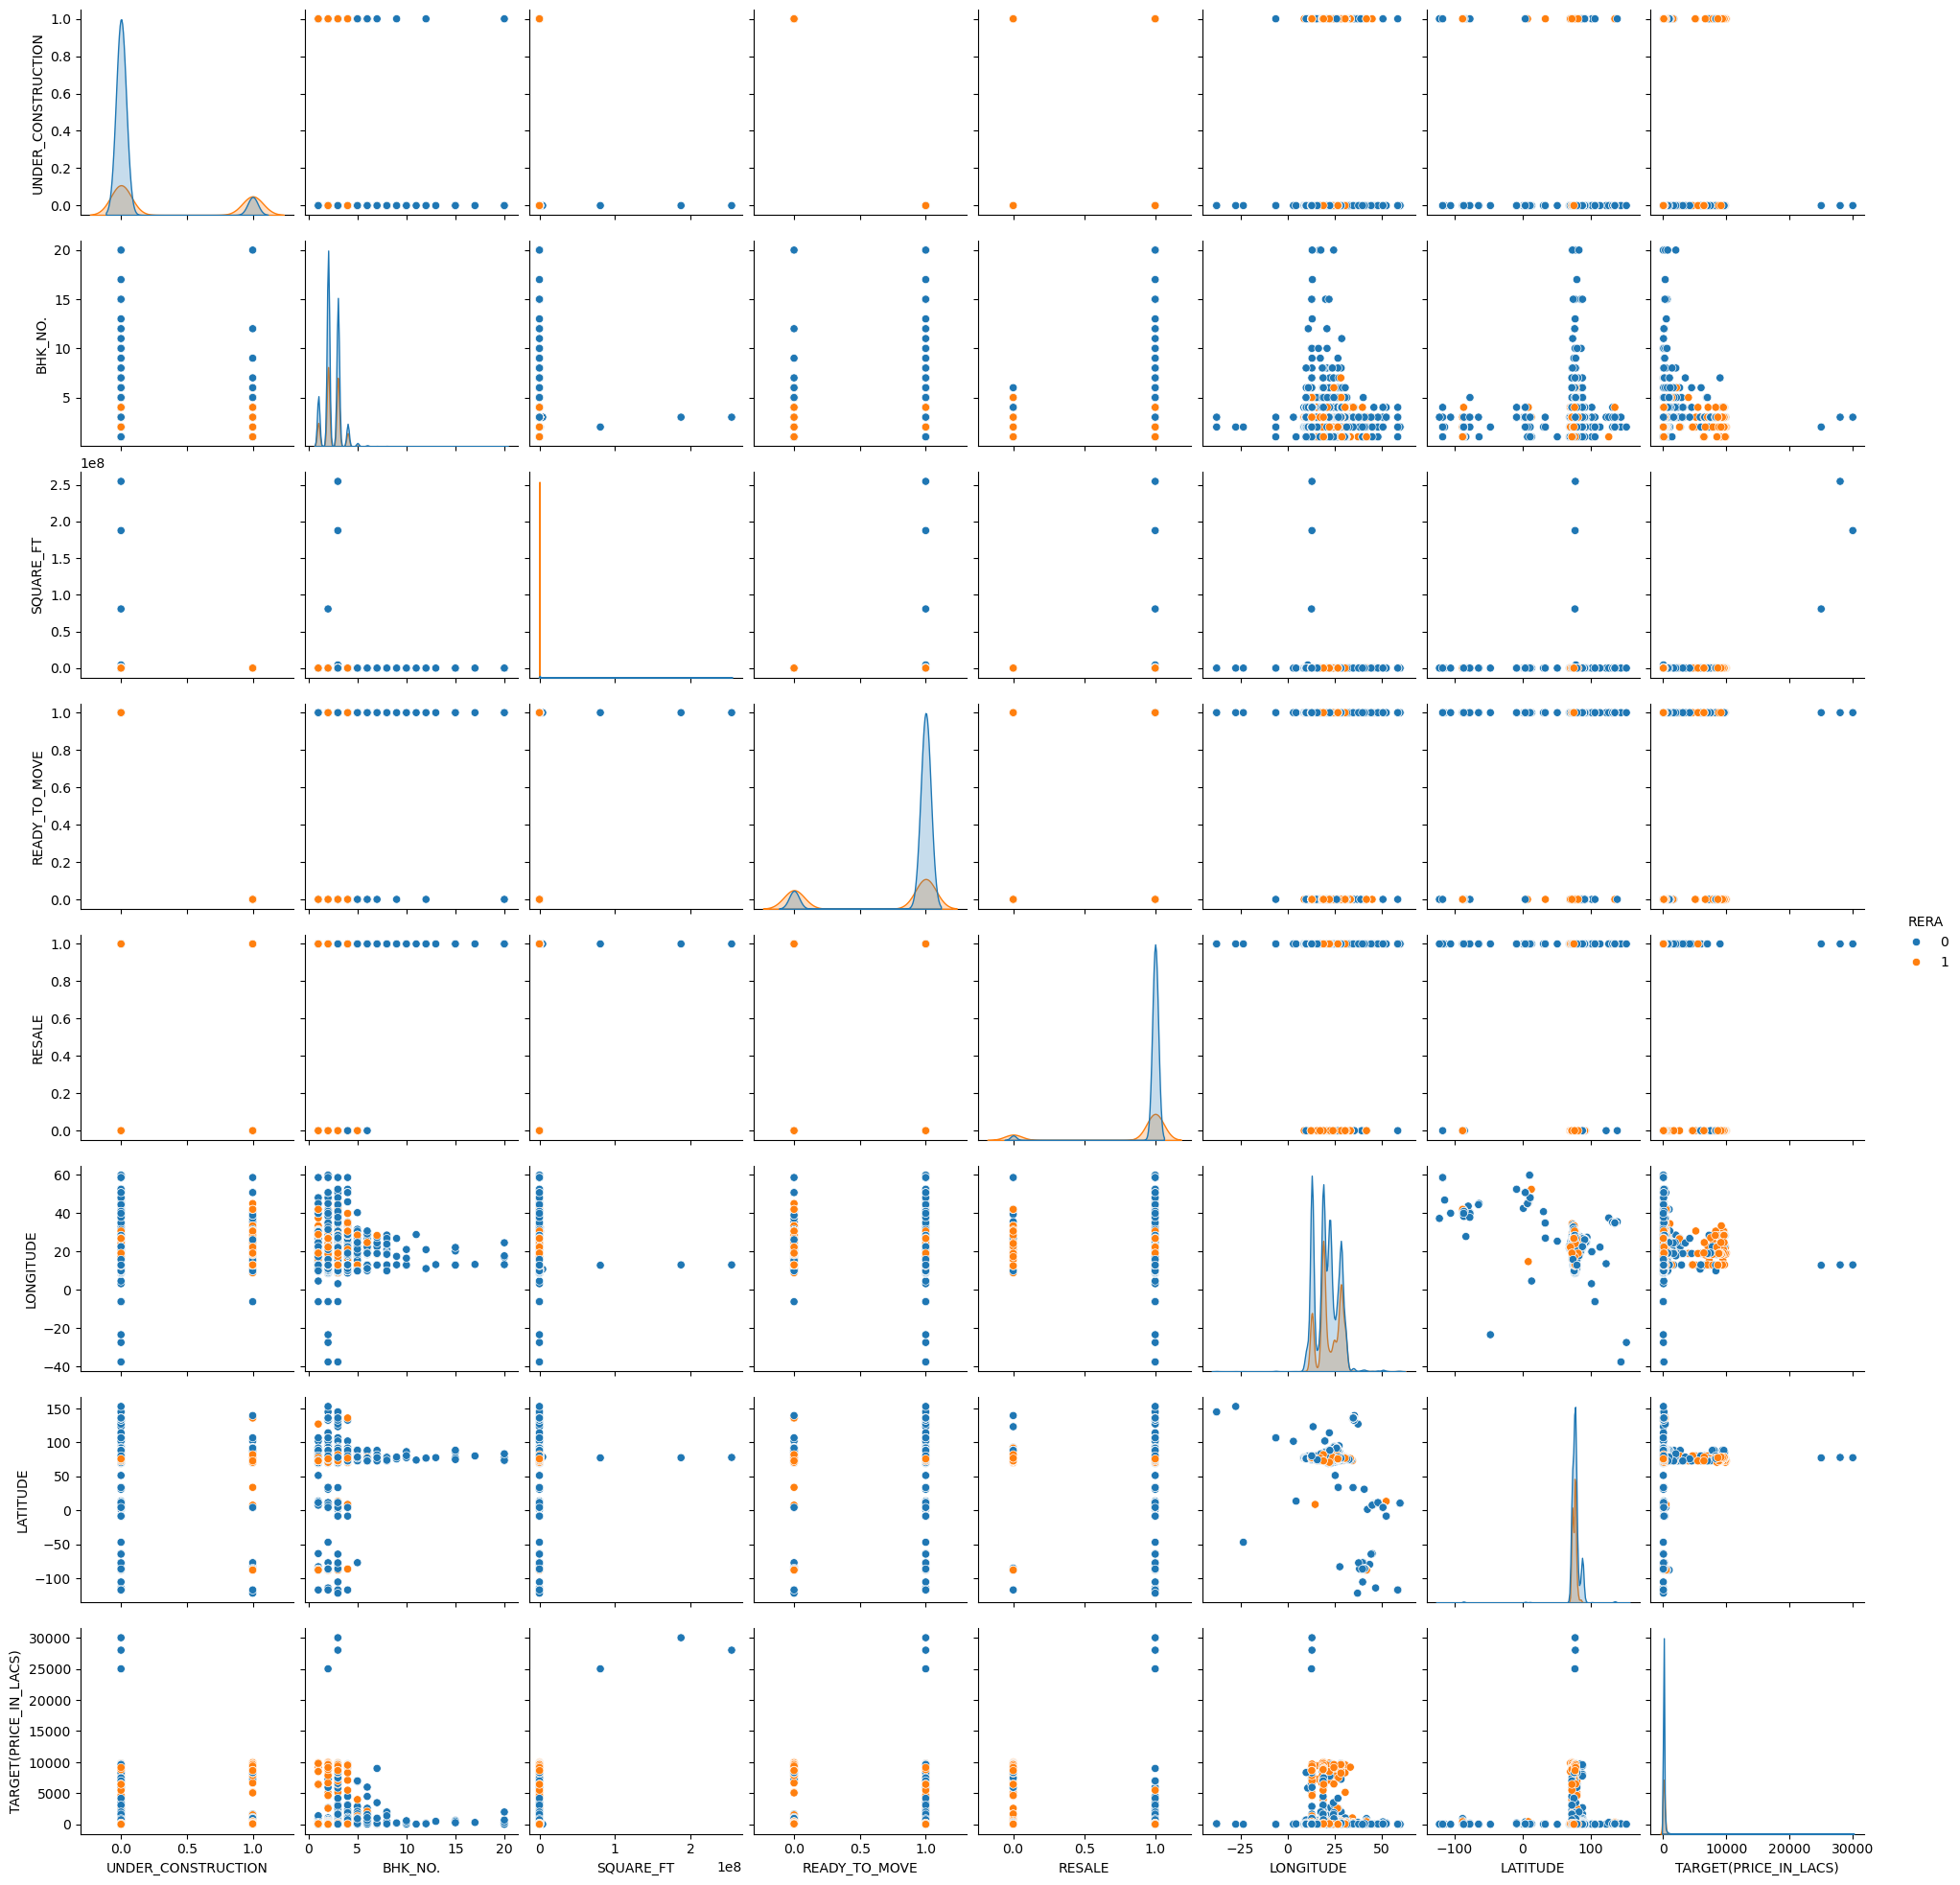

In [20]:
sns.pairplot(train, hue='RERA',diag_kind="kde")

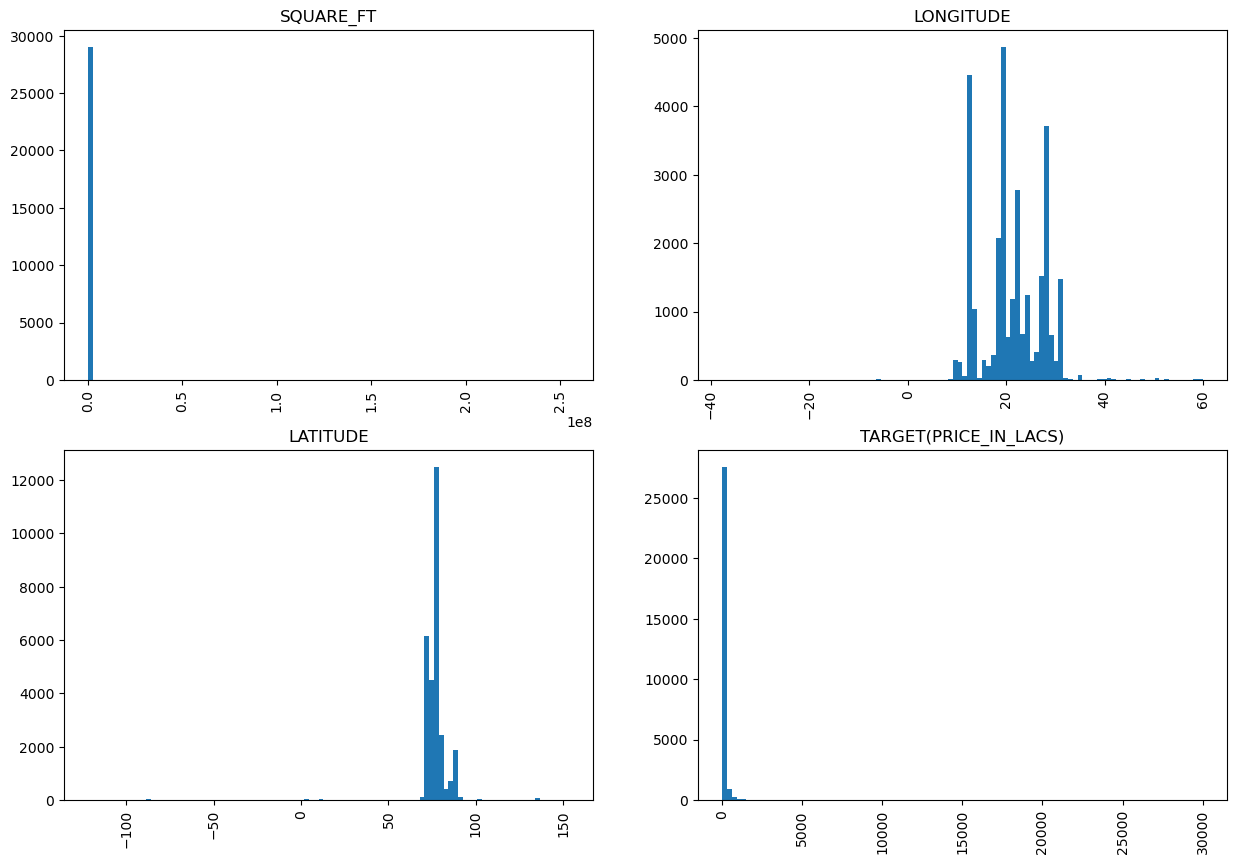

In [21]:

fig, axes = plt.subplots(math.ceil(len(num_col)/2), 2, figsize=(15,5*math.ceil(len(num_col)/2)))

for i, col_name in enumerate(num_col):
    row = i // 2
    col = i%2
    axes[row][col].hist(train[col_name], bins=100)
    axes[row][col].set_title(col_name)
    axes[row][col].tick_params(axis='x', rotation=90)

<Axes: xlabel='TARGET(PRICE_IN_LACS)', ylabel='Count'>

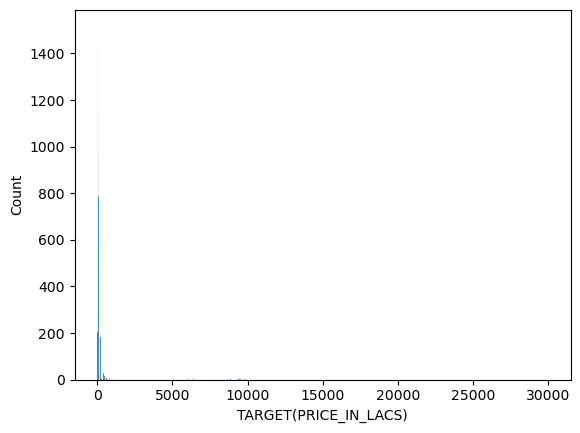

In [22]:
sns.histplot(train['TARGET(PRICE_IN_LACS)'])

<Axes: >

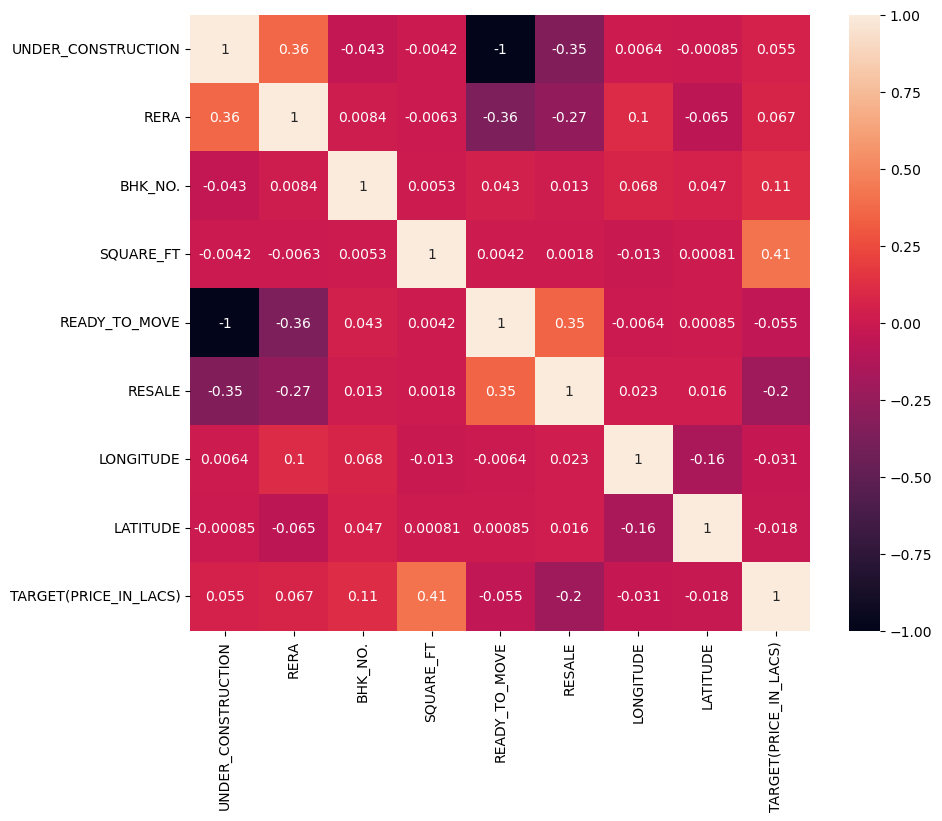

In [23]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(train.corr(numeric_only=True), annot=True, ax=ax)

`UNDER_CONSTRUCTION` and `READY_TO_MOVE` have perfect negative correlation i.e **multicollinearity**. It can be an issue when training the model.

In [24]:
len(train['ADDRESS'].unique())

6899

In [25]:
train['ADDRESS'].value_counts().head()

ADDRESS
Zirakpur,Chandigarh              474
Whitefield,Bangalore             222
Raj Nagar Extension,Ghaziabad    212
Sector-137 Noida,Noida           136
New Town,Kolkata                 129
Name: count, dtype: int64

### Price comparisions between the unique values in the features

**Address**

In [26]:
Addr_data = train[['ADDRESS','TARGET(PRICE_IN_LACS)']].groupby(['ADDRESS'])

In [27]:
Addr_data.max().sort_values(by='TARGET(PRICE_IN_LACS)', ascending=False).head()

,TARGET(PRICE_IN_LACS)
ADDRESS,
"R.T. Nagar,Bangalore",30000.0
"Malur,Bangalore",28000.0
"Lakkasandra,Bangalore",25000.0
"Thane West,Lalitpur",9990.0
"Chinchwad,Pune",9910.0


**RESALE**

In [28]:
resale_data = train[['RESALE','TARGET(PRICE_IN_LACS)']].groupby(['RESALE'])

In [29]:
resale_data.max()

,TARGET(PRICE_IN_LACS)
RESALE,
0,9990.0
1,30000.0


In [30]:
for col in cat_col:
    col_data = train[[col,'TARGET(PRICE_IN_LACS)']].groupby([col]) 
    print(col_data.max().sort_values(by='TARGET(PRICE_IN_LACS)', ascending=False))

           TARGET(PRICE_IN_LACS)
POSTED_BY                       
Dealer                   30000.0
Owner                    28000.0
Builder                   9700.0
                    TARGET(PRICE_IN_LACS)
UNDER_CONSTRUCTION                       
0                                 30000.0
1                                  9990.0
      TARGET(PRICE_IN_LACS)
RERA                       
0                   30000.0
1                    9990.0
         TARGET(PRICE_IN_LACS)
BHK_NO.                       
3                      30000.0
2                      25000.0
1                       9900.0
4                       9700.0
7                       9000.0
5                       7000.0
6                       6000.0
8                       2000.0
20                      2000.0
15                       650.0
10                       600.0
13                       500.0
17                       320.0
9                        240.0
12                       200.0
11                        55

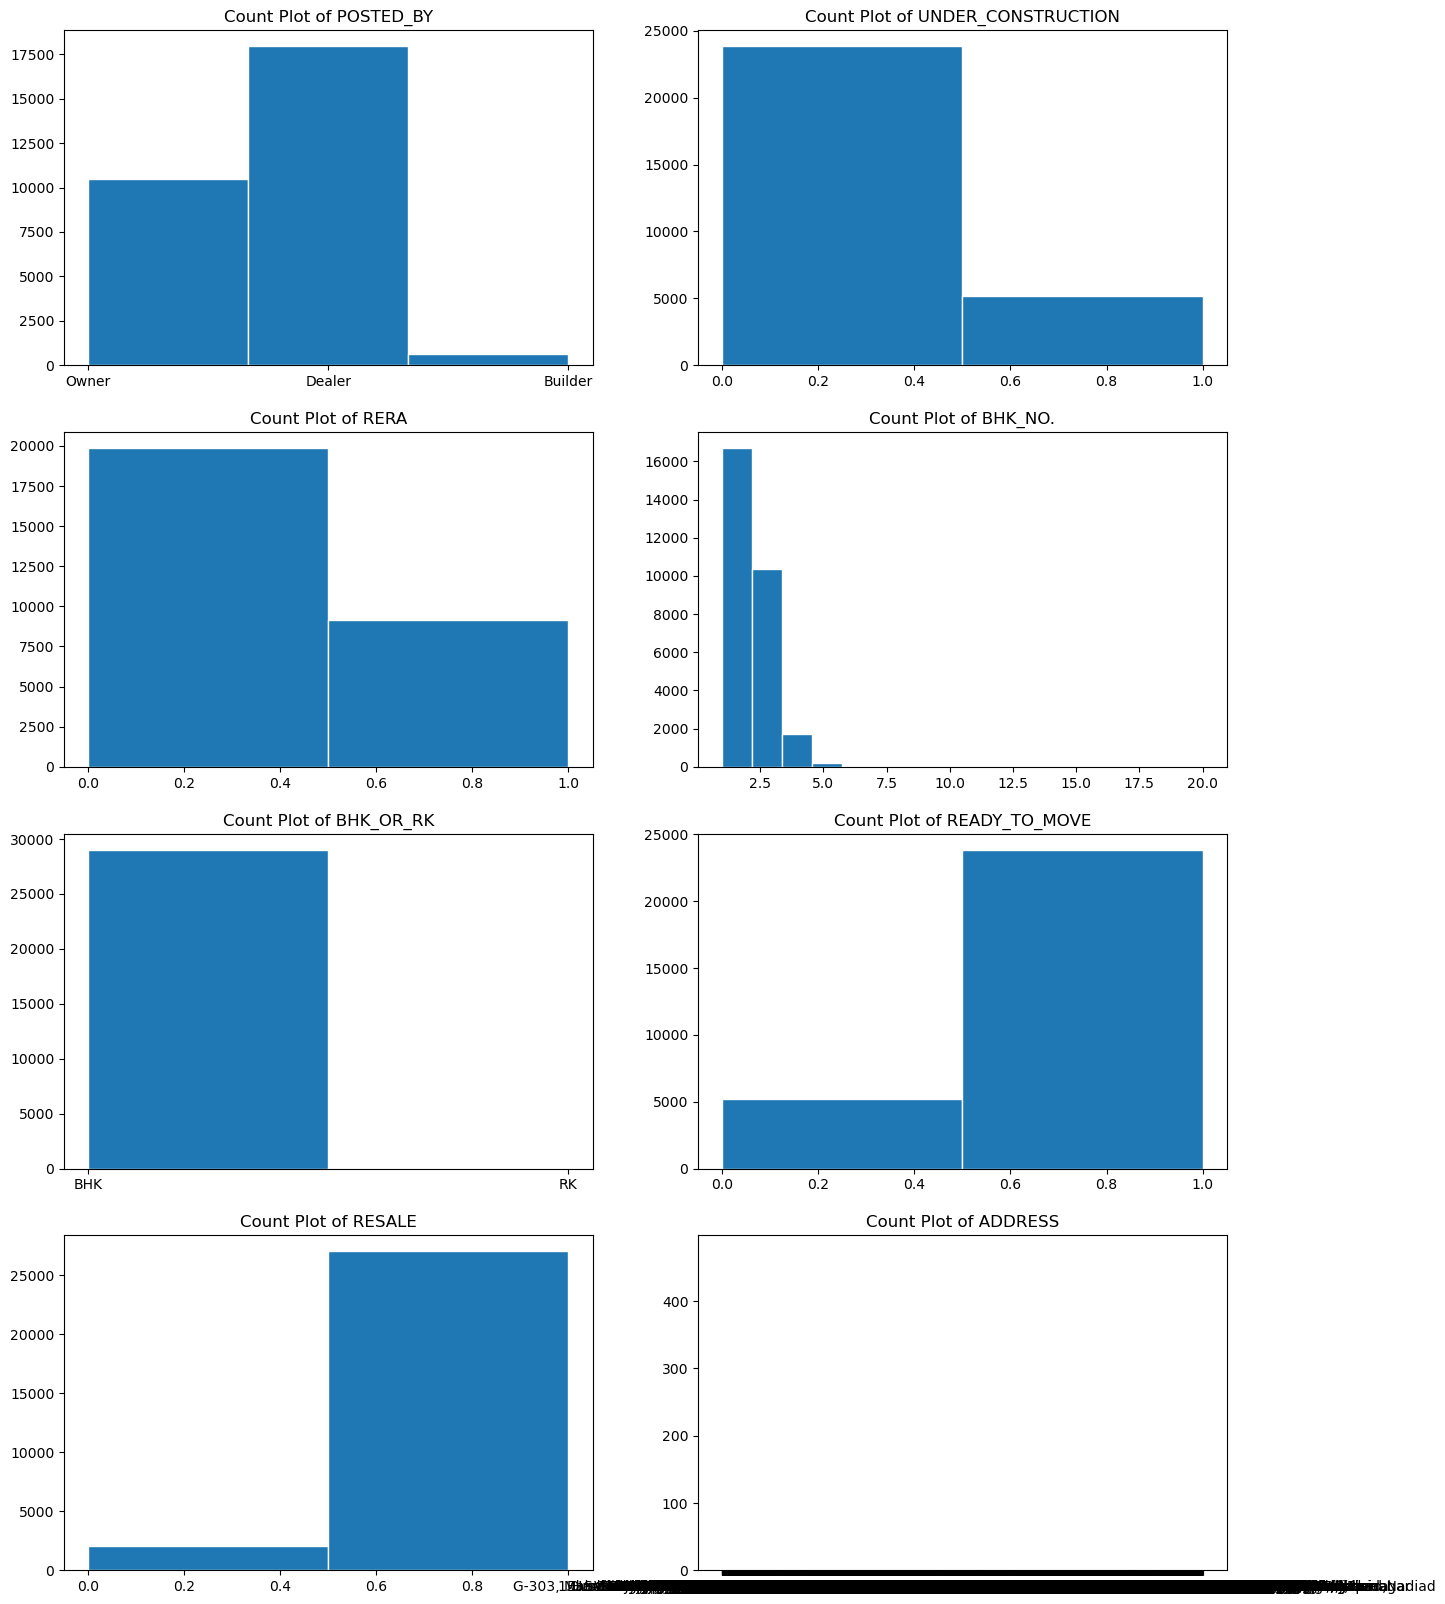

In [31]:
fig, axes = plt.subplots(nrows = (len(cat_col)//2), ncols=2, figsize=(15, 5*math.ceil(len(cat_col))/2))

for i, col in enumerate(cat_col):
    row = i // 2
    column = i % 2

    axes[row][column].hist(train[col], bins=len(train[col].unique()), histtype='bar', edgecolor='white')
    # axes[row,column].bar(train[col])
    axes[row][column].set_title(f"Count Plot of {col}")

fig.savefig('Countplot_cat_col.png')

## Handling Outliers

<Axes: xlabel='TARGET(PRICE_IN_LACS)'>

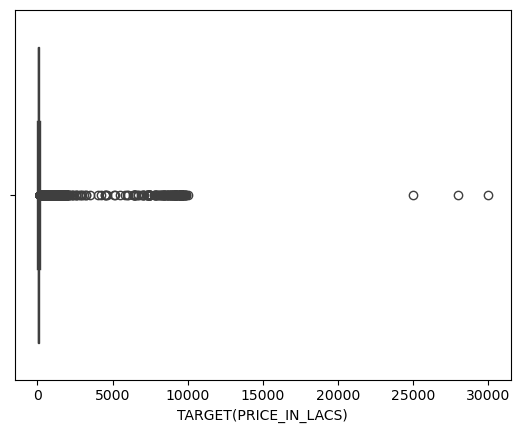

In [32]:
sns.boxplot(x=train['TARGET(PRICE_IN_LACS)'])

<Axes: xlabel='SQUARE_FT'>

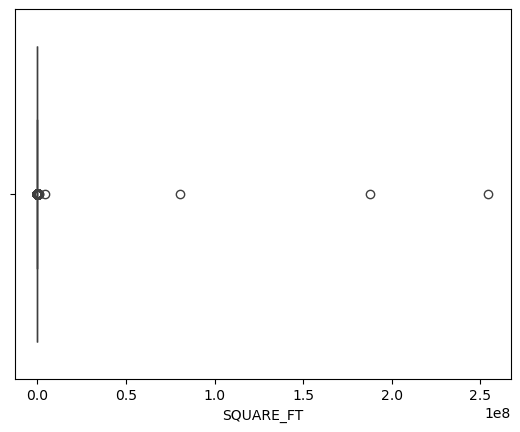

In [33]:
sns.boxplot(x=train['SQUARE_FT'])

In [34]:
train[train['TARGET(PRICE_IN_LACS)']>10000]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
10745,Owner,0,0,3,BHK,2.545455e+08,1,1,"Malur,Bangalore",13.021000,77.938000,28000.0
11238,Dealer,0,0,3,BHK,1.875000e+08,1,1,"R.T. Nagar,Bangalore",13.018900,77.596300,30000.0
15724,Owner,0,0,2,BHK,8.064516e+07,1,1,"Lakkasandra,Bangalore",12.795926,77.331535,25000.0


In [35]:
train[train['TARGET(PRICE_IN_LACS)']<10][train['BHK_NO.']>=3]

/tmp/ipykernel_28419/4278908077.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train[train['TARGET(PRICE_IN_LACS)']<10][train['BHK_NO.']>=3]


,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
3882,Owner,0,0,10,BHK,42500.000000,1,1,"Dharga,Hosur",12.720000,77.820000,0.85
8347,Owner,0,1,3,BHK,1333.333333,1,1,"Bhayli,Vadodara",22.288976,73.128222,1.00
14036,Owner,0,0,3,BHK,1923.076923,1,1,"Bomikhal,Bhubaneswar",20.282380,85.855363,0.25
16405,Owner,1,1,3,BHK,1490.066225,0,1,"Sector 89 Faridabad,Faridabad",28.431903,77.364821,9.00
17527,Dealer,0,0,3,BHK,1830.985915,1,1,"Sanjay nagar,Bangalore",13.035200,77.577200,1.30
20125,Dealer,0,0,3,BHK,1583.166333,1,1,"Kashimira,Lalitpur",24.690280,78.418890,7.90
24424,Builder,0,0,3,BHK,753.846154,1,0,"Uran,Lalitpur",18.963700,72.931400,4.90
27192,Owner,0,0,3,BHK,1526.315789,1,1,"New Siddhapudur,Coimbatore",11.023232,76.979607,0.29


In [36]:
train.drop(train[train['TARGET(PRICE_IN_LACS)'] > 10000].index, inplace=True)

In [37]:
train.drop(train[train['TARGET(PRICE_IN_LACS)']<10][train['BHK_NO.']>=3].index, inplace=True)

/tmp/ipykernel_28419/1849808982.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train.drop(train[train['TARGET(PRICE_IN_LACS)']<10][train['BHK_NO.']>=3].index, inplace=True)


<Axes: xlabel='TARGET(PRICE_IN_LACS)'>

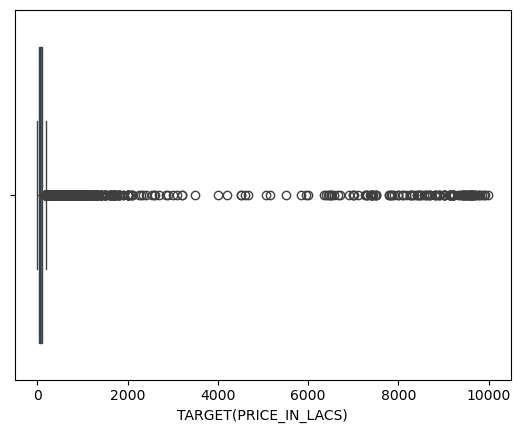

In [38]:
sns.boxplot(x=train['TARGET(PRICE_IN_LACS)'])

<Axes: xlabel='SQUARE_FT'>

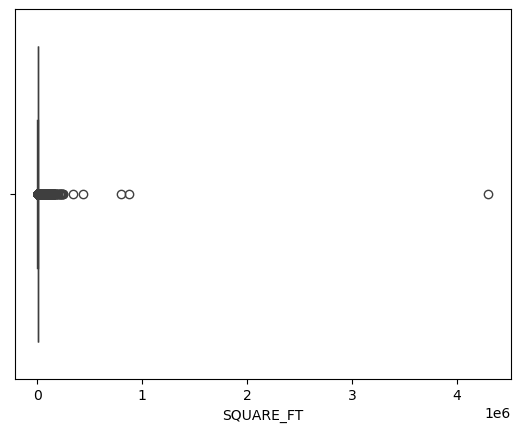

In [39]:
sns.boxplot(x = train['SQUARE_FT'])

In [40]:
train[train['BHK_NO.'] > 10 ]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
2215,Owner,0,0,12,BHK,6373.486297,1,1,"Ashok Nagar , Kalapatti, Coimbatore District,C...",11.086274,77.033799,200.0
3466,Owner,0,0,20,BHK,348.863897,1,1,"Rat,Ratnagiri",16.983330,73.300000,15.2
8872,Dealer,0,0,13,BHK,10460.251050,1,1,"Bagalur,Bangalore",13.143933,77.667304,500.0
13440,Owner,0,0,17,BHK,11000.343760,1,1,"Karanodai,Chennai",13.252330,80.163376,320.0
16278,Owner,0,0,15,BHK,3000.107147,1,1,"Jharapada,Bhubaneswar",20.275267,85.862407,280.0
16397,Owner,0,0,11,BHK,4000.000000,1,1,"Jaipur road,Bikaner",28.863593,74.048835,55.0
16429,Owner,0,0,15,BHK,15001.153930,1,1,"Laggere,Bangalore",13.008595,77.523704,650.0
17160,Owner,1,0,12,BHK,4570.848146,0,1,"Vilankurichi,Coimbatore",11.074387,77.018510,180.0
19425,Owner,0,0,12,BHK,4824.561404,1,1,"Factory circle bashettalli,Bangalore",21.000000,77.000000,110.0
20745,Owner,1,0,20,BHK,7000.000000,0,1,"Hunasamaranahalli,Bangalore",13.143000,77.619000,350.0


In [41]:
train.drop([3466], inplace=True)

In [42]:
train[train['SQUARE_FT']==max(train['SQUARE_FT'])]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
25241,Owner,0,0,3,BHK,4300000.0,1,1,"New Kumaran Nagar,Chennai",10.810426,78.668914,43.0


In [43]:
train.drop([25241], inplace=True)

1. index `3466` is an outlier as it hae 20BHK in `348`sqFt at the rpce of 15.2 lacs
2. index `25241` is also an outlier as it has only 3BHK for a **large** area of 43 lacs
3. data with `price` < 1 lacs and having 3BHK is also outlier

<Axes: xlabel='TARGET(PRICE_IN_LACS)'>

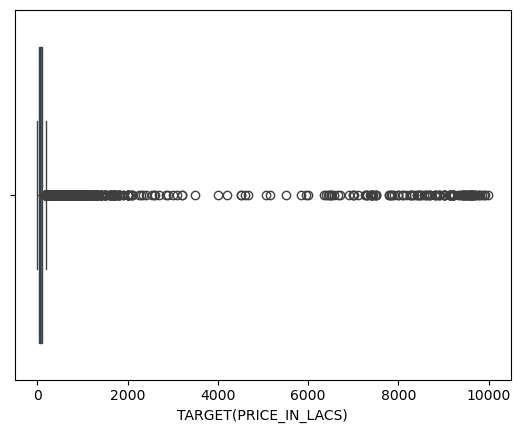

In [44]:
sns.boxplot(x=train['TARGET(PRICE_IN_LACS)'])

<Axes: xlabel='SQUARE_FT'>

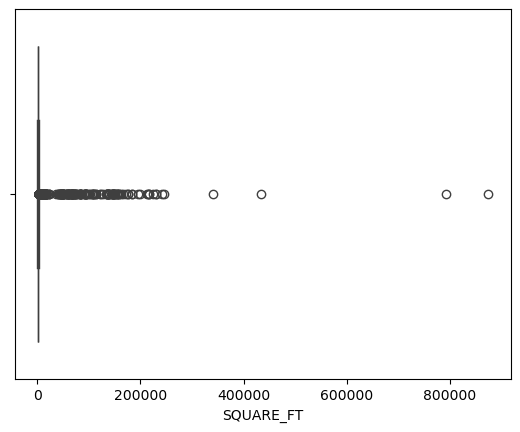

In [45]:
sns.boxplot(x=train['SQUARE_FT'])

### Test Dataset

In [46]:
test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [47]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68720 entries, 0 to 68719
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   POSTED_BY           68720 non-null  object 
 1   UNDER_CONSTRUCTION  68720 non-null  int64  
 2   RERA                68720 non-null  int64  
 3   BHK_NO.             68720 non-null  int64  
 4   BHK_OR_RK           68720 non-null  object 
 5   SQUARE_FT           68720 non-null  float64
 6   READY_TO_MOVE       68720 non-null  int64  
 7   RESALE              68720 non-null  int64  
 8   ADDRESS             68720 non-null  object 
 9   LONGITUDE           68720 non-null  float64
 10  LATITUDE            68720 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 5.8+ MB


In [48]:
test.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
count,68720.000000,68720.000000,68720.000000,6.872000e+04,68720.000000,68720.000000,68720.000000,68720.000000
mean,0.176557,0.316531,2.388198,2.762419e+03,0.823443,0.933498,21.288045,76.919388
std,0.381296,0.465126,0.864577,1.640991e+05,0.381296,0.249159,6.179034,10.100950
min,0.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,-38.391261,-118.354100
25%,0.000000,0.000000,2.000000,9.000310e+02,1.000000,1.000000,18.452663,73.798100
50%,0.000000,0.000000,2.000000,1.174982e+03,1.000000,1.000000,20.933260,77.324966
75%,0.000000,1.000000,3.000000,1.550265e+03,1.000000,1.000000,26.888396,78.000723
max,1.000000,1.000000,31.000000,4.016393e+07,1.000000,1.000000,65.183330,175.278040


In [49]:
test.nunique()

POSTED_BY                 3
UNDER_CONSTRUCTION        2
RERA                      2
BHK_NO.                  17
BHK_OR_RK                 2
SQUARE_FT             37704
READY_TO_MOVE             2
RESALE                    2
ADDRESS               11048
LONGITUDE              5907
LATITUDE               5914
dtype: int64

In [50]:
test['POSTED_BY'].value_counts()

POSTED_BY
Dealer     42437
Owner      24920
Builder     1363
Name: count, dtype: int64

## Data Preprocessing

In [51]:
df = pd.concat([train,test])
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
68715,Dealer,0,1,2,BHK,856.555505,1,1,"Thane West,Maharashtra",19.180000,72.963330,NaN
68716,Dealer,0,1,3,BHK,2304.147465,1,1,"Sector-66A Mohali,Mohali",30.661104,76.746082,NaN
68717,Dealer,1,1,1,BHK,33362.792750,0,0,"Balkum,Maharashtra",19.222101,72.988231,NaN
68718,Dealer,0,0,2,BHK,1173.708920,1,1,"Hadapsar,Pune",18.496670,73.941670,NaN


In [52]:
lbl_encoder = LabelEncoder()

In [53]:
enc = lbl_encoder.fit_transform(df['BHK_OR_RK'])

In [54]:
lbl_encoder.classes_

array(['BHK', 'RK'], dtype=object)

In [55]:
lbl_encoder.inverse_transform([0,1])

array(['BHK', 'RK'], dtype=object)

BHK-->0<br>
RK-->1

In [56]:
df['BHK_OR_RK'] = enc

In [57]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,0,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,0,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,0,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,0,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,0,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [58]:
enc = lbl_encoder.fit_transform(df['POSTED_BY'])

In [59]:
lbl_encoder.classes_

array(['Builder', 'Dealer', 'Owner'], dtype=object)

In [60]:
np.unique(enc)

array([0, 1, 2])

In [61]:
lbl_encoder.inverse_transform([0,1,2])

array(['Builder', 'Dealer', 'Owner'], dtype=object)

Builder-->0 <br>
Dealer-->1 <br>
Owner-->2

In [62]:
df['POSTED_BY'] = enc

In [63]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,2,0,0,2,0,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,1,0,0,2,0,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,2,0,0,2,0,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,2,0,1,2,0,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,1,1,0,2,0,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


## Feature Selection
Drop:
1. Address: too many unique data and already we have longitude and latitue feature
2. READY_TO_MOVE: has perfect multicollinearity with `UNDER_CONSTRUCTION`

In [64]:
df.drop(columns=['READY_TO_MOVE','ADDRESS'], inplace=True)
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,2,0,0,2,0,1300.236407,1,12.969910,77.597960,55.0
1,1,0,0,2,0,1275.000000,1,12.274538,76.644605,51.0
2,2,0,0,2,0,933.159722,1,12.778033,77.632191,43.0
3,2,0,1,2,0,929.921143,1,28.642300,77.344500,62.5
4,1,1,0,2,0,999.009247,1,22.592200,88.484911,60.5


In [65]:
train_processed = df[~df['TARGET(PRICE_IN_LACS)'].isnull()]
test_processed = df[df['TARGET(PRICE_IN_LACS)'].isnull()]

In [66]:
train_processed

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,2,0,0,2,0,1300.236407,1,12.969910,77.597960,55.0
1,1,0,0,2,0,1275.000000,1,12.274538,76.644605,51.0
2,2,0,0,2,0,933.159722,1,12.778033,77.632191,43.0
3,2,0,1,2,0,929.921143,1,28.642300,77.344500,62.5
4,1,1,0,2,0,999.009247,1,22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...
29446,2,0,0,3,0,2500.000000,1,27.140626,78.043277,45.0
29447,2,0,0,2,0,769.230769,1,39.945409,-86.150721,16.0
29448,1,0,0,2,0,1022.641509,1,26.928785,75.828002,27.1
29449,2,0,0,2,0,927.079009,1,12.900150,80.227910,67.0


In [67]:
test_processed

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,2,0,0,1,0,545.171340,1,21.262000,73.047700,NaN
1,1,1,1,2,0,800.000000,0,18.966114,73.148278,NaN
2,1,0,0,2,0,1257.096513,1,22.592200,88.484911,NaN
3,1,0,0,3,0,1400.329489,1,26.988300,75.584600,NaN
4,2,0,0,1,0,430.477830,1,22.700000,72.870000,NaN
...,...,...,...,...,...,...,...,...,...,...
68715,1,0,1,2,0,856.555505,1,19.180000,72.963330,NaN
68716,1,0,1,3,0,2304.147465,1,30.661104,76.746082,NaN
68717,1,1,1,1,0,33362.792750,0,19.222101,72.988231,NaN
68718,1,0,0,2,0,1173.708920,1,18.496670,73.941670,NaN


## Model Training

### Linear Regression

In [68]:
lr_model = LinearRegression()

In [69]:
X = train_processed.drop(columns=['TARGET(PRICE_IN_LACS)'])
X

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,RESALE,LONGITUDE,LATITUDE
0,2,0,0,2,0,1300.236407,1,12.969910,77.597960
1,1,0,0,2,0,1275.000000,1,12.274538,76.644605
2,2,0,0,2,0,933.159722,1,12.778033,77.632191
3,2,0,1,2,0,929.921143,1,28.642300,77.344500
4,1,1,0,2,0,999.009247,1,22.592200,88.484911
...,...,...,...,...,...,...,...,...,...
29446,2,0,0,3,0,2500.000000,1,27.140626,78.043277
29447,2,0,0,2,0,769.230769,1,39.945409,-86.150721
29448,1,0,0,2,0,1022.641509,1,26.928785,75.828002
29449,2,0,0,2,0,927.079009,1,12.900150,80.227910


In [70]:
y = train_processed['TARGET(PRICE_IN_LACS)']
y

0        55.0
1        51.0
2        43.0
3        62.5
4        60.5
         ... 
29446    45.0
29447    16.0
29448    27.1
29449    67.0
29450    27.8
Name: TARGET(PRICE_IN_LACS), Length: 29037, dtype: float64

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=33, test_size=0.3)

In [72]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [73]:
lr_model.coef_

array([-4.09485398e+01, -1.45965167e+01,  2.30344419e+01,  5.98684875e+01,
       -3.33988120e+00,  3.47136238e-02, -2.69421913e+02, -3.83049788e+00,
       -1.44611467e+00])

In [74]:
lr_model.intercept_

np.float64(425.6995674744527)

In [75]:
y_pred = lr_model.predict(X_test)

In [76]:
lr_model.score(X_test, y_test)

0.2597352173803912

In [77]:
r2_score(y_test, y_pred)

0.2597352173803912

Text(0.5, 0, 'Predicted')

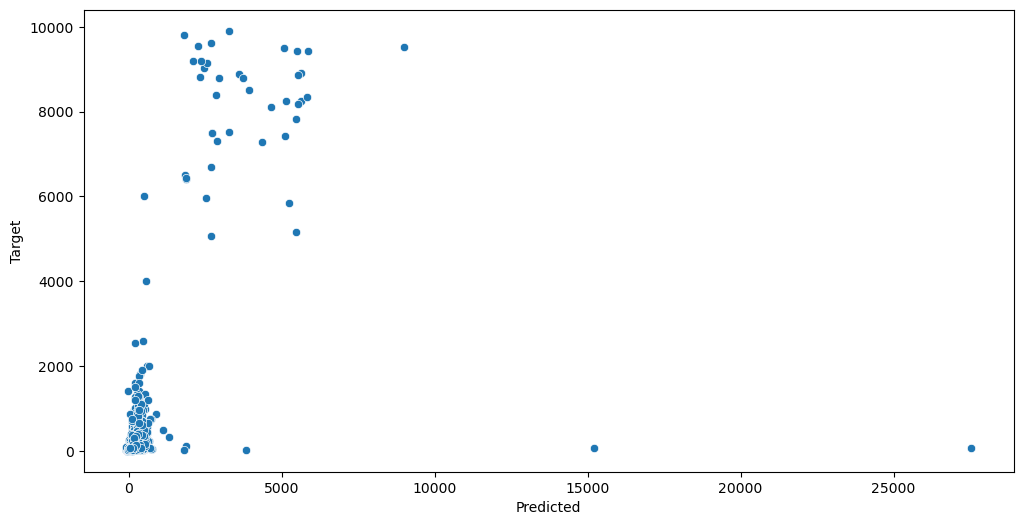

In [78]:
fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(x=y_pred, y=y_test, ax=ax)
ax.set_ylabel("Target")
ax.set_xlabel("Predicted")

In [79]:
max(y_train)

9990.0

### DecisionTreeRegression

In [81]:
dtreereg = DecisionTreeRegressor()

In [82]:
dtreereg.fit(X_train,y_train)

DecisionTreeRegressor()

In [83]:
pred_y = dtreereg.predict(X_test)

In [84]:
r2_score(y_test, pred_y)

0.9247704367944525